In [1]:
import census_utils 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn import datasets, tree, metrics, model_selection, ensemble, neural_network
from sklearn.externals.six import StringIO
from tensorflow.keras import models, layers, datasets, utils, optimizers

/Users/tom/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# ensure descriptions are not truncated 
pd.set_option('display.max_colwidth', -1)

### Data Extraction 

In [3]:
# genlookup test
# lookup = census_utils.genlookup()
lookup = pd.read_pickle('../lookup/lookuptable.pkl') 

In [4]:
lookup.head(50)

TableCode  \
UniqueCatCode             
DC5202SC0001   DC5202SC   
DC5202SC0002   DC5202SC   
DC5202SC0003   DC5202SC   
DC5202SC0004   DC5202SC   
DC5202SC0005   DC5202SC   
DC5202SC0006   DC5202SC   
DC5202SC0007   DC5202SC   
DC5202SC0008   DC5202SC   
DC5202SC0009   DC5202SC   
DC5202SC0010   DC5202SC   
DC5202SC0011   DC5202SC   
DC5202SC0012   DC5202SC   
DC5202SC0013   DC5202SC   
DC5202SC0014   DC5202SC   
DC5202SC0015   DC5202SC   
DC5202SC0016   DC5202SC   
DC5202SC0017   DC5202SC   
DC5202SC0018   DC5202SC   
DC5202SC0019   DC5202SC   
DC5202SC0020   DC5202SC   
DC5202SC0021   DC5202SC   
DC5202SC0022   DC5202SC   
DC5202SC0023   DC5202SC   
DC5202SC0024   DC5202SC   
DC5202SC0025   DC5202SC   
DC5202SC0026   DC5202SC   
DC5202SC0027   DC5202SC   
DC5202SC0028   DC5202SC   
DC5202SC0029   DC5202SC   
DC5202SC0030   DC5202SC   
DC5202SC0031   DC5202SC   
DC5202SC0032   DC5202SC   
DC5202SC0033   DC5202SC   
DC5202SC0034   DC5202SC   
DC5202SC0035   DC5202SC   
DC5202SC0036   DC5202SC   
DC5202SC0037   DC5202SC   
DC5202SC0038   DC5202SC   
DC5202SC0039   DC5202SC   
DC5202SC0040   DC5202SC   
DC5202SC0041   DC5202SC   
DC5202SC0042   DC5202SC   
DC5202SC0043   DC5202SC   
DC5202SC0044   DC5202SC   
DC5202SC0045   DC5202SC   
DC5202SC0046   DC5202SC   
DC5202SC0047   DC5202SC   
DC5202SC0048   DC5202SC   
DC5202SC0049   DC5202SC   
DC5202SC0050   DC5202SC   

                                                    TableDescription CatCode  \
UniqueCatCode                                                                  
DC5202SC0001   Highest level of qualification by ethnic group by age  0001     
DC5202SC0002   Highest level of qualification by ethnic group by age  0002     
DC5202SC0003   Highest level of qualification by ethnic group by age  0003     
DC5202SC0004   Highest level of qualification by ethnic group by age  0004     
DC5202SC0005   Highest level of qualification by ethnic group by age  0005     
DC5202SC0006   Highest level of qualification by ethnic group by age  0006     
DC5202SC0007   Highest level of qualification by ethnic group by age  0007     
DC5202SC0008   Highest level of qualification by ethnic group by age  0008     
DC5202SC0009   Highest level of qualification by ethnic group by age  0009     
DC5202SC0010   Highest level of qualification by ethnic group by age  0010     
DC5202SC0011   Highest level of qualification by ethnic group by age  0011     
DC5202SC0012   Highest level of qualification by ethnic group by age  0012     
DC5202SC0013   Highest level of qualification by ethnic group by age  0013     
DC5202SC0014   Highest level of qualification by ethnic group by age  0014     
DC5202SC0015   Highest level of qualification by ethnic group by age  0015     
DC5202SC0016   Highest level of qualification by ethnic group by age  0016     
DC5202SC0017   Highest level of qualification by ethnic group by age  0017     
DC5202SC0018   Highest level of qualification by ethnic group by age  0018     
DC5202SC0019   Highest level of qualification by ethnic group by age  0019     
DC5202SC0020   Highest level of qualification by ethnic group by age  0020     
DC5202SC0021   Highest level of qualification by ethnic group by age  0021     
DC5202SC0022   Highest level of qualification by ethnic group by age  0022     
DC5202SC0023   Highest level of qualification by ethnic group by age  0023     
DC5202SC0024   Highest level of qualification by ethnic group by age  0024     
DC5202SC0025   Highest level of qualification by ethnic group by age  0025     
DC5202SC0026   Highest level of qualification by ethnic group by age  0026     
DC5202SC0027   Highest level of qualification by ethnic group by age  0027     
DC5202SC0028   Highest level of qualification by ethnic group by age  0028     
DC5202SC0029   Highest level of qualification by ethnic group by age  0029     
DC5202SC0030   Highest level of qualification by ethnic group by age  0030     
DC5202SC0031   Highest level of qualification by 

In [5]:
#lookup.TableDescription.unique()

In [6]:
lookup[lookup.TableCode == 'DC2107SC'].head()

TableCode        TableDescription CatCode  \
UniqueCatCode                                             
DC2107SC0001   DC2107SC  Religion by sex by age  0001     
DC2107SC0002   DC2107SC  Religion by sex by age  0002     
DC2107SC0003   DC2107SC  Religion by sex by age  0003     
DC2107SC0004   DC2107SC  Religion by sex by age  0004     
DC2107SC0005   DC2107SC  Religion by sex by age  0005     

                                     CatDescription  
UniqueCatCode                                        
DC2107SC0001   All people:_Total_All people          
DC2107SC0002   All people:_Total_Church of Scotland  
DC2107SC0003   All people:_Total_Roman Catholic      
DC2107SC0004   All people:_Total_Other Christian     
DC2107SC0005   All people:_Total_Buddhist

In [7]:
lookup.shape

(60416, 4)

In [8]:
requested = { 'LC4427SC': ['0003'],
              'LC1112SC': ['0006'],
              'LC6109SC': ['0005']
            }
norm = { 'LC4427SC' : { '0003':'0001' },
         'LC1112SC' : { '0006':'0004' },
         'LC6109SC' : { '0005':'0001' }
       }

features = census_utils.extractdata(requested, norm)

In [9]:
features.head()

LC4427SC0003  LC1112SC0006  LC6109SC0005
ONSCode                                            
S29000001  0.148478      0.258344      0.772363    
S29000002  0.246404      0.333205      0.807342    
S29000003  0.251430      0.351715      0.718368    
S29000004  0.096805      0.237463      0.747791    
S29000005  0.128045      0.256037      0.816162

In [10]:
features.shape

(1012, 3)

In [11]:
# multi-feature classifier 
requested = { 'LC3102SC': ['0002', '0003', '0004', '0005', '0006'] }
weights = { 'LC3102SC0002' : 5, 
           'LC3102SC0003' : 4,
           'LC3102SC0004' : 3,
           'LC3102SC0005' : 2,
           'LC3102SC0006' : 1 }
tiers = [0.1, 0.2, 0.5, 0.8]
outcome = census_utils.genclfscore(requested, weights, tiers)
#outcome = census_utils.genclfscore(requested, weights, tiers, geo=geo)

/Users/tom/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
outcome.head()

Score  Class
ONSCode                   
S29000001  4.442207  5    
S29000002  4.486076  5    
S29000003  4.285078  3    
S29000004  4.430728  5    
S29000005  4.532379  5

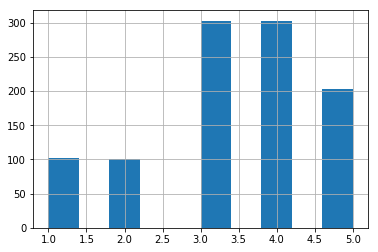

In [13]:
outcome.Class.hist()

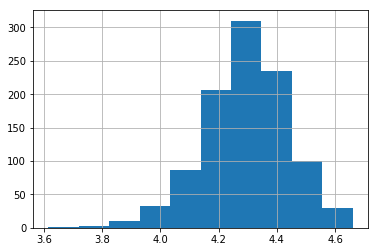

In [14]:
outcome.Score.hist()

In [15]:
#single feature classification 
feature = 'LC3102SC0002'
norm = 'LC3102SC0001' 
tiers = [0.1, 0.2, 0.5, 0.8]
outcome = genclfsingle(feature, tiers, norm)

NameError: name 'genclfsingle' is not defined

In [ ]:
#outcome.head()

In [16]:
# extract data and rarget 
data = features.values
target = outcome['Class'].values 
data.shape, target.shape

((1012, 3), (1012,))

In [17]:
target[0:5], features.columns.values

(array([5, 5, 3, 5, 5]),
 array(['LC4427SC0003', 'LC1112SC0006', 'LC6109SC0005'], dtype=object))

### Visualisation 

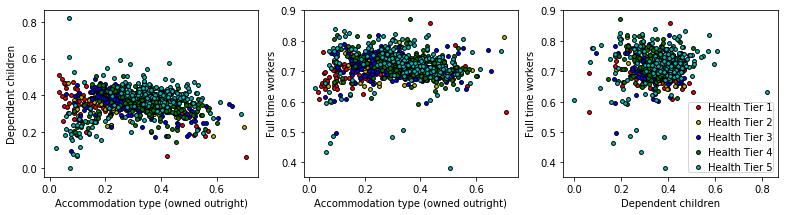

In [18]:
classes = [1, 2, 3, 4, 5]
flabels = ['Accommodation type (owned outright)', 'Dependent children', 'Full time workers']
clabels = ['Health Tier 1', 'Health Tier 2', 'Health Tier 3', 'Health Tier 4', 'Health Tier 5']
census_utils.featureplot(data, target, classes, flabels, clabels)

In [19]:
features.shape

(1012, 3)

In [20]:
census_utils.genchoropleth(features, 'LC6109SC0005')

In [21]:
# customised map 
copts = { "fill_color" : "YlGn", "legend_name" : "Proportion of Household owners"}
mopts = { "location" : [55.95, -3.19], "zoom_start" : 10}
census_utils.genchoropleth(features, 'LC4427SC0003', mopts_custom=mopts, copts_custom=copts)

### Machine learning

In [22]:
train_data, test_data, train_target, test_target = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=0)

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(708, 3) (708,) (304, 3) (304,)


In [23]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=30)
fit = clf.fit(train_data, train_target)

['Accommodation type (owned outright)', 'Dependent children', 'Full time workers'] [1, 2, 3, 4, 5]


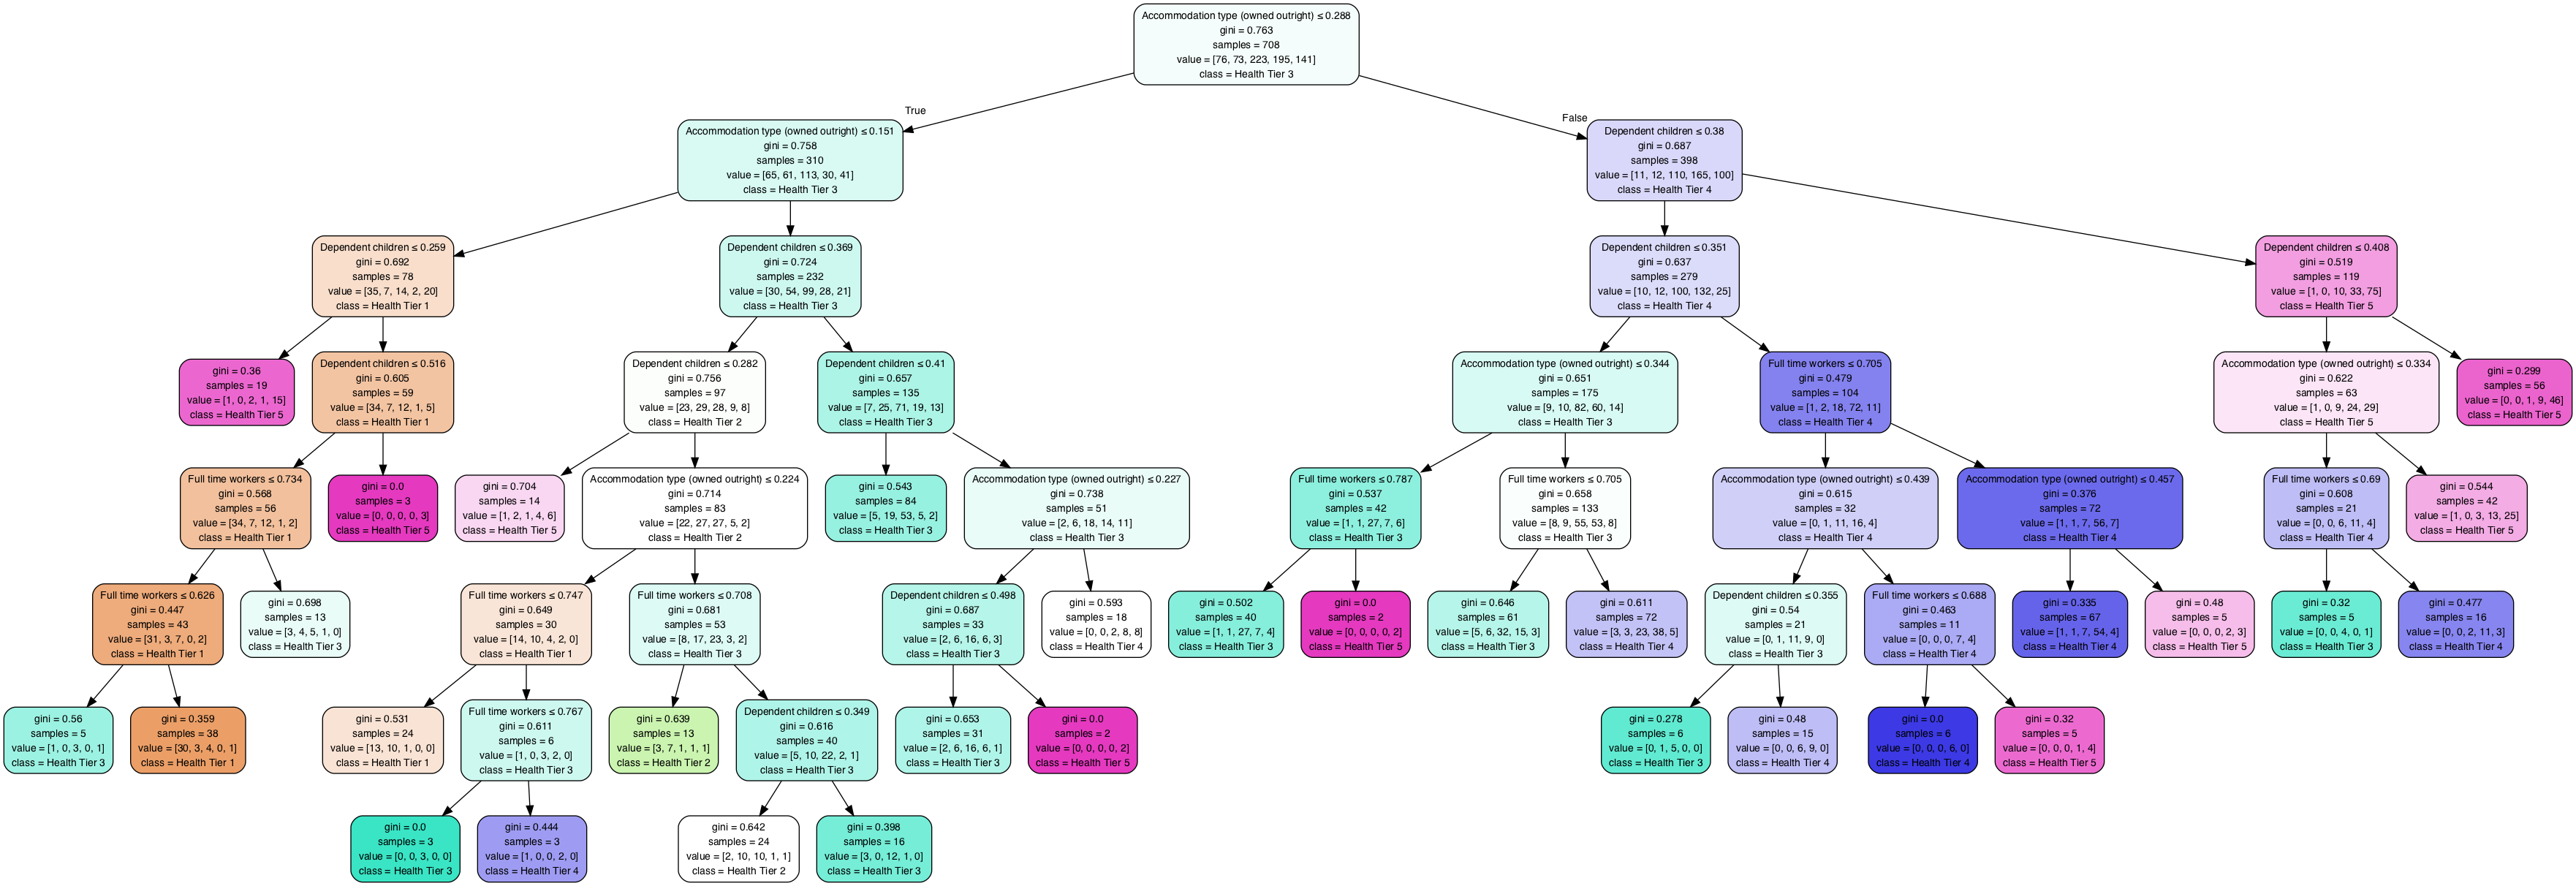

In [24]:
# plot decision tree 
print(flabels, classes)
graph = census_utils.plotDT(fit, flabels, clabels)
Image(graph.create_png())

In [25]:
expected = test_target
predicted = clf.predict(test_data)

In [26]:
report = metrics.classification_report(expected, predicted)
print(report)

             precision    recall  f1-score   support

          1       0.55      0.46      0.50        26
          2       0.29      0.14      0.19        28
          3       0.52      0.66      0.58        80
          4       0.61      0.56      0.58       108
          5       0.45      0.48      0.47        62

avg / total       0.52      0.52      0.51       304



In [27]:
# get confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

[[12  6  8  0  0]
 [ 4  4 18  0  2]
 [ 2  3 53 18  4]
 [ 2  0 15 60 31]
 [ 2  1  8 21 30]]


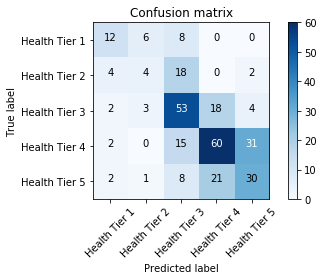

In [28]:
# plot confusion matrix 
census_utils.plot_cm(cm, clabels)
plt.show()

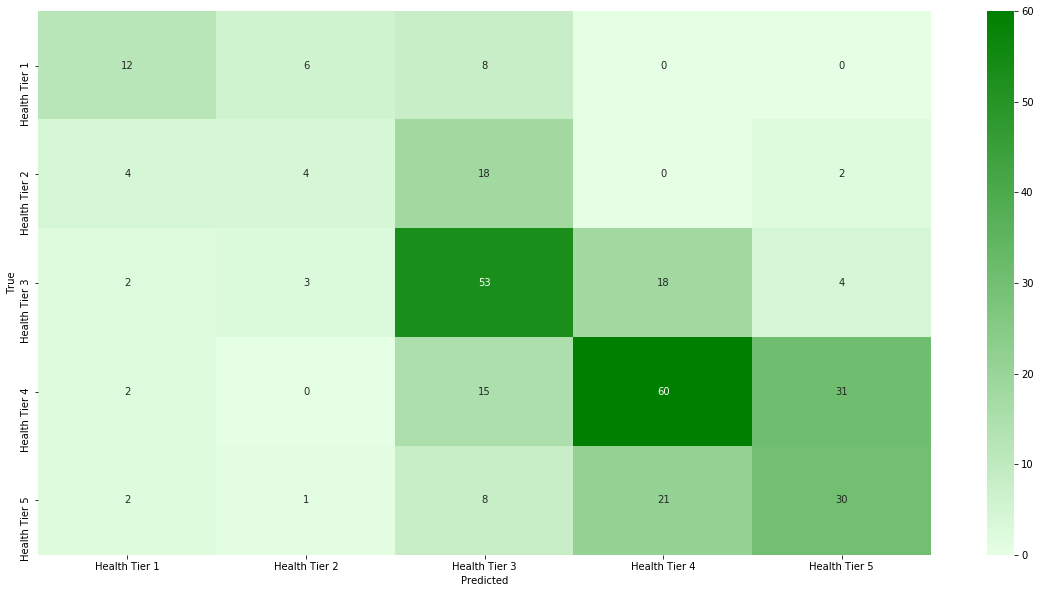

In [29]:
# heat map confusion matrix 
census_utils.heatmap(cm, labels=['Predicted', 'True'], classes=[clabels,clabels], normalize=False, size='large')
plt.show()

In [30]:
# Cross validation 
scores = model_selection.cross_val_score(clf, data, target, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.47317073 0.5        0.48768473 0.62       0.425     ]
Accuracy: 0.50 (+/- 0.13)


In [44]:
# parameter search 
params = {'max_leaf_nodes' : [2, 3, 4, 5, 10, 20, 30, 50, 100], 
          'max_depth' : [2, 3, 4, 5, 6, 7, 8, 10]
         }
score = 'accuracy'
clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), params, cv=5, scoring='%s' % score)
clf.fit(train_data, train_target)

print(clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

# uncomment to show explicit list of means/std
for mean, std, param in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
               % (mean, std * 2, param))

{'max_depth': 4, 'max_leaf_nodes': 100}
0.391 (+/-0.050) for {'max_depth': 2, 'max_leaf_nodes': 2}
0.446 (+/-0.051) for {'max_depth': 2, 'max_leaf_nodes': 3}
0.445 (+/-0.050) for {'max_depth': 2, 'max_leaf_nodes': 4}
0.472 (+/-0.084) for {'max_depth': 2, 'max_leaf_nodes': 5}
0.499 (+/-0.115) for {'max_depth': 2, 'max_leaf_nodes': 10}
0.499 (+/-0.115) for {'max_depth': 2, 'max_leaf_nodes': 20}
0.499 (+/-0.115) for {'max_depth': 2, 'max_leaf_nodes': 30}
0.499 (+/-0.115) for {'max_depth': 2, 'max_leaf_nodes': 50}
0.499 (+/-0.115) for {'max_depth': 2, 'max_leaf_nodes': 100}
0.391 (+/-0.050) for {'max_depth': 3, 'max_leaf_nodes': 2}
0.446 (+/-0.051) for {'max_depth': 3, 'max_leaf_nodes': 3}
0.445 (+/-0.050) for {'max_depth': 3, 'max_leaf_nodes': 4}
0.472 (+/-0.084) for {'max_depth': 3, 'max_leaf_nodes': 5}
0.473 (+/-0.117) for {'max_depth': 3, 'max_leaf_nodes': 10}
0.465 (+/-0.128) for {'max_depth': 3, 'max_leaf_nodes': 20}
0.465 (+/-0.128) for {'max_depth': 3, 'max_leaf_nodes': 30}
0.465 (

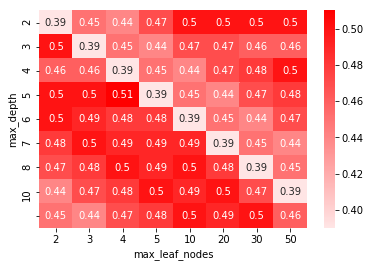

In [49]:
# heatmap (only works on 2D grid search!)
labels = [k for k,v in params.items()]
classes = [v for k,v in params.items()]
census_utils.heatmap(means.reshape(9,8), classes, labels, palette="Red")
plt.show()

#def heatmap(d, classes=None, labels=None, title=None,
#             palette="Green",
#             normalize=False,
#             annot=True,
#             size=None):

In [47]:
# random forest 
clf = ensemble.RandomForestClassifier(n_estimators=50, max_features=2)
d = model_selection.train_test_split(data, target, test_size=0.3, random_state=0)
e, p = census_utils.runML(clf, d)
report = metrics.classification_report(e, p)
print(report)

             precision    recall  f1-score   support

          1       0.40      0.38      0.39        26
          2       0.39      0.25      0.30        28
          3       0.49      0.61      0.55        80
          4       0.53      0.50      0.52       108
          5       0.51      0.50      0.50        62

avg / total       0.49      0.50      0.49       304



CPU times: user 18 s, sys: 169 ms, total: 18.2 s
Wall time: 18.5 s


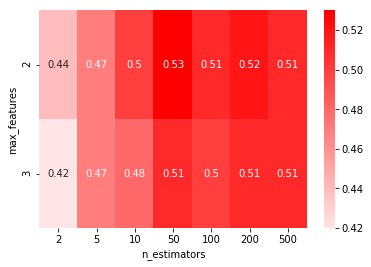

In [34]:
%%time 

# ensemble parameter search 
params = {'n_estimators' : [2, 5, 10, 50, 100, 200, 500], 
          'max_features' : [2, 3]
         }
score = 'accuracy'
clf = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), params, cv=5, scoring='%s' % score)
clf.fit(train_data, train_target)
means = clf.cv_results_['mean_test_score']
labels = [k for k,v in params.items()]
classes = [v for k,v in params.items()]
census_utils.heatmap(means.reshape(2,7), classes, labels, palette="Red")

In [35]:
%%time

## NN fit
clf = neural_network.MLPClassifier(max_iter=2000, hidden_layer_sizes=(50,))
fit = clf.fit(train_data, train_target)

CPU times: user 4.33 s, sys: 90.6 ms, total: 4.42 s
Wall time: 2.42 s


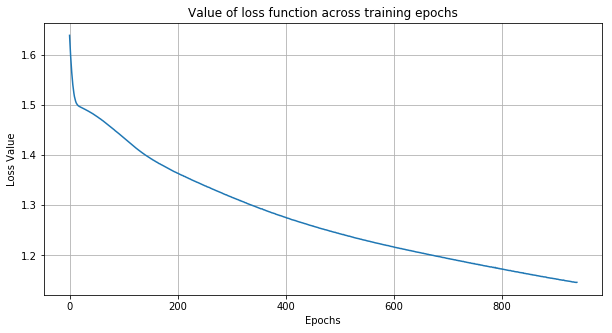

In [36]:
census_utils.lossplot(clf.loss_curve_)
plt.show()

In [37]:
expected = test_target
predicted = clf.predict(test_data)

In [38]:
report = metrics.classification_report(expected, predicted)
print(report)

             precision    recall  f1-score   support

          1       0.21      0.23      0.22        26
          2       0.00      0.00      0.00        28
          3       0.36      0.57      0.44        80
          4       0.55      0.56      0.55       108
          5       0.56      0.35      0.44        62

avg / total       0.42      0.44      0.42       304



/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


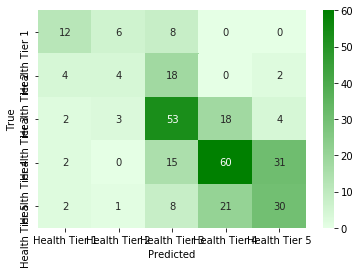

In [39]:
# heat map confusion matrix 
census_utils.heatmap(cm, labels=['Predicted', 'True'], classes=[clabels,clabels], normalize=False)
plt.show()

NN parameters
{'max_iter': 100, 'hidden_layer_sizes': (50,)}
Split sample:
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5
 0.6  0.7  0.8  0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
Running with test size of: 0.01
Running with test size of: 0.02


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.03


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.04


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.05


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.06


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.07


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.08


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.09


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.10


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.20
Running with test size of: 0.30


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.40
Running with test size of: 0.50


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.60
Running with test size of: 0.70


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Running with test size of: 0.80
Running with test size of: 0.90
Running with test size of: 0.91


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  %

Running with test size of: 0.92
Running with test size of: 0.93
Running with test size of: 0.94
Running with test size of: 0.95
Running with test size of: 0.96


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  %

Running with test size of: 0.97
Running with test size of: 0.98
Running with test size of: 0.99


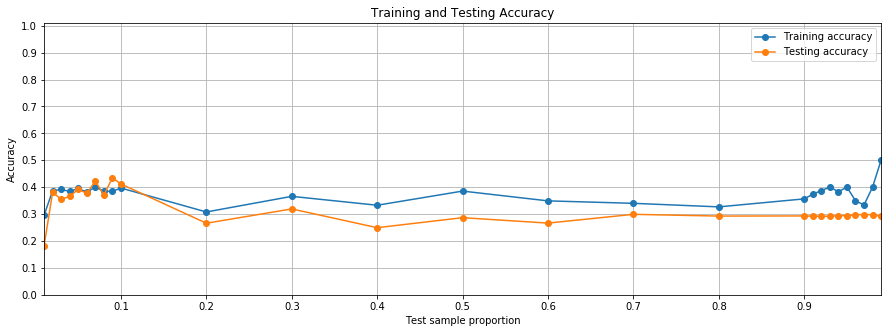

In [40]:
# plot training/testing variation 
params = { 'max_iter' : 100 , 'hidden_layer_sizes' : (50,) }
census_utils.compare_traintest(data, target, params=params)
plt.show()    

In [41]:
# set number of classes 
batch_size = 128 
num_classes = 5

In [42]:
#convert class vectors to binary class matrices
train_target = utils.to_categorical(train_target, num_classes)
test_target = utils.to_categorical(test_target, num_classes)

IndexError: index 5 is out of bounds for axis 1 with size 5

In [ ]:
#check on shapes
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

In [ ]:
# construct network
# 23 input layer x 100 hidden x 3 output
 model = models.Sequential()
 model.add(layers.Dense(100, activation='relu', input_shape=(23,)))
 model.add(layers.Dropout(0.2))
 model.add(layers.Dense(100, activation='relu'))
 model.add(layers.Dropout(0.2))
 model.add(layers.Dense(num_classes, activation='softmax'))
 model.summary()

In [ ]:
 batch_size = 128
 epochs = 100

In [ ]:
 model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
 %%time 
 history = model.fit(train_data, train_target,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(test_data, test_target))

In [ ]:
# get test accuracy
 score = model.evaluate(test_data, test_target, verbose=1)
 print('Test loss:', score[0])
 print('Test accuracy:', score[1])